# Execute the code below

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [2]:
# Complete x, y and z in the script below:
px.scatter_3d(x = 'MAX_TEMPERATURE_C', 
              y = 'MIN_TEMPERATURE_C', 
              z= 'SUNHOUR', 
              data_frame=df_weather)


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y). 

**Remember to save the result of your prediction in a cew column 'predict'.**

In [5]:
# Your code here :
X = df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']] 
y = df_weather['MAX_TEMPERATURE_C'] 

modelLR = LinearRegression().fit(X, y)

df_weather['predict'] = modelLR.predict(df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']])
df_weather.head()


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,predict
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1,8.980922
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2,12.353602
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3,7.410233
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4,4.037552
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5,6.421559


### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [6]:
# Your code here :
px.scatter_3d(x = 'predict', 
              y = 'MIN_TEMPERATURE_C', 
              z= 'SUNHOUR', 
              data_frame=df_weather)


**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware : 
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

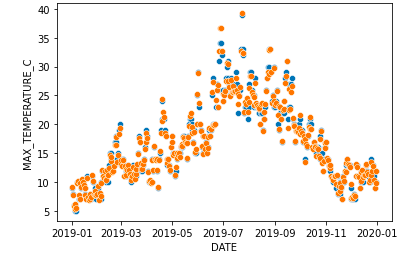

In [8]:
# Your code here :
X = df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR', 'WINDSPEED_MAX_KMH', 	'TEMPERATURE_MORNING_C',	'TEMPERATURE_NOON_C', 	'TEMPERATURE_EVENING_C', 	'PRECIP_TOTAL_DAY_MM', 	'HUMIDITY_MAX_PERCENT', 	'VISIBILITY_AVG_KM', 	'PRESSURE_MAX_MB', 	'CLOUDCOVER_AVG_PERCENT', 	'HEATINDEX_MAX_C', 	'DEWPOINT_MAX_C',	'WINDTEMP_MAX_C', 	'WEATHER_CODE_MORNING', 	'WEATHER_CODE_NOON', 	'WEATHER_CODE_EVENING', 	'TOTAL_SNOW_MM', 	'UV_INDEX']] 
y = df_weather['MAX_TEMPERATURE_C'] 

modelLR = LinearRegression().fit(X, y)

df_weather['predict2'] = modelLR.predict(X)
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,predict,predict2
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1,8.980922,9.098345
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2,12.353602,7.739923
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3,7.410233,5.869554
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4,4.037552,5.354696
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5,6.421559,6.112450


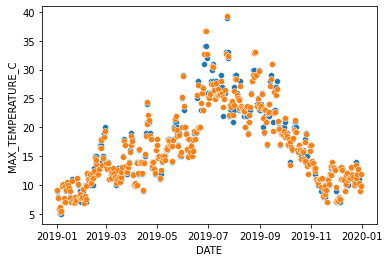

In [10]:
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])
sns.scatterplot(x='DATE',
                y='MAX_TEMPERATURE_C',
                data = df_weather)
sns.scatterplot(x='DATE',
                y='predict2',
                data = df_weather)
plt.show()

You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [14]:
for i, j in zip (X.columns, modelLR.coef_):
  print(i,j)


MIN_TEMPERATURE_C 0.05743184113677728
SUNHOUR -0.02257013378046202
WINDSPEED_MAX_KMH -0.0024352877555788134
TEMPERATURE_MORNING_C -0.08268374414564954
TEMPERATURE_NOON_C 0.18816823718726264
TEMPERATURE_EVENING_C 0.17719153160059475
PRECIP_TOTAL_DAY_MM 0.00521049915936787
HUMIDITY_MAX_PERCENT -0.0027953224455117788
VISIBILITY_AVG_KM 0.008433573684342874
PRESSURE_MAX_MB -0.0018879020321533168
CLOUDCOVER_AVG_PERCENT -0.006331518295059614
HEATINDEX_MAX_C 0.5830201683414984
DEWPOINT_MAX_C -0.036432346511732994
WINDTEMP_MAX_C 0.05792033964479801
WEATHER_CODE_MORNING 0.0005218133943660845
WEATHER_CODE_NOON 4.0832612770624144e-05
WEATHER_CODE_EVENING -0.00027452987152733665
TOTAL_SNOW_MM 0.0
UV_INDEX -0.028901273840493097


In [16]:
# HEATINDEX_MAX_C 0.5830201683414984